# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#%reload_ext autoreload
#%autoreload 2  

# Import data

In [30]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [13]:
df = sns.load_dataset("car_crashes")

In [15]:
df.head(2)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK


# Distribution Plot

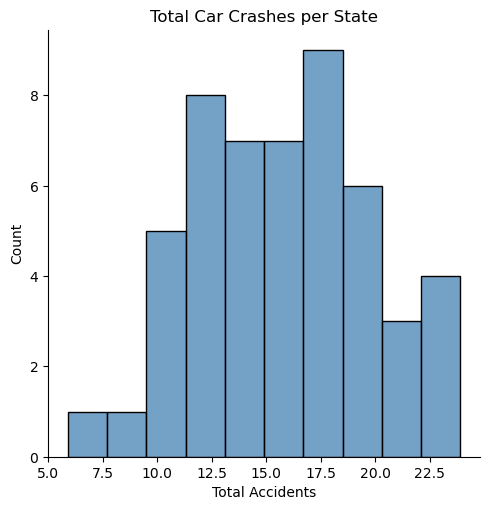

In [37]:
sns.displot(data=df, x="total", bins=10, kde=False, color="steelblue")
plt.title("Total Car Crashes per State")
plt.xlabel("Total Accidents")
plt.ylabel("Count")
plt.show()

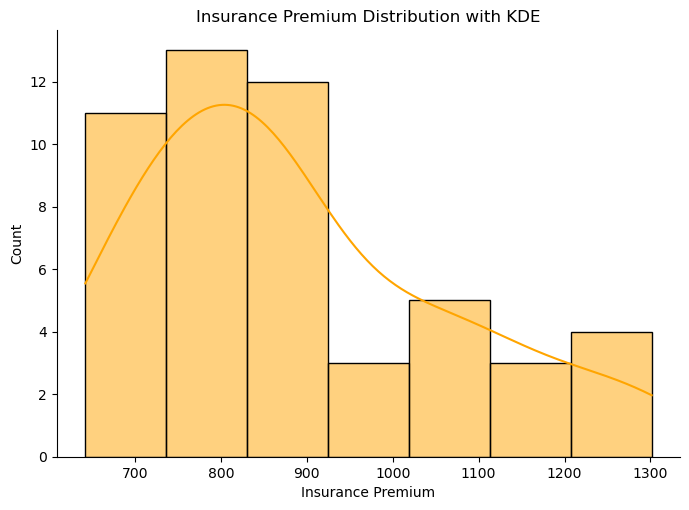

In [39]:
sns.displot(data=df, x="ins_premium", kde=True, color="orange", height=5, aspect=1.4)
plt.title("Insurance Premium Distribution with KDE")
plt.xlabel("Insurance Premium")
plt.ylabel("Count")
plt.show()

# Joint Plot

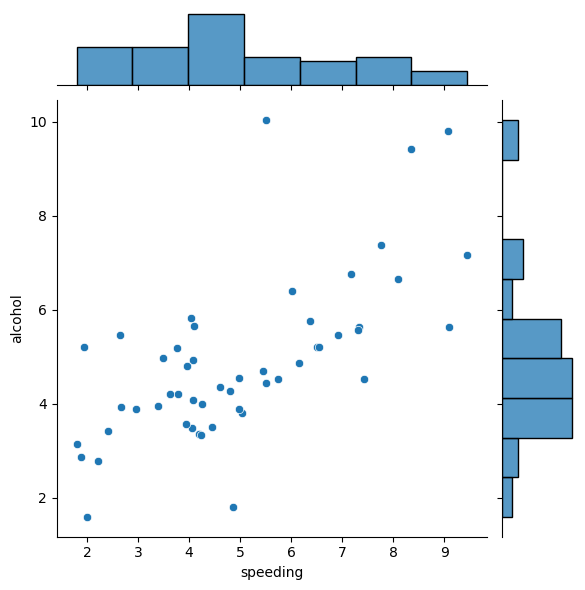

In [41]:
# Simple scatter jointplot
sns.jointplot(x="speeding", y="alcohol", data=df)
plt.show()

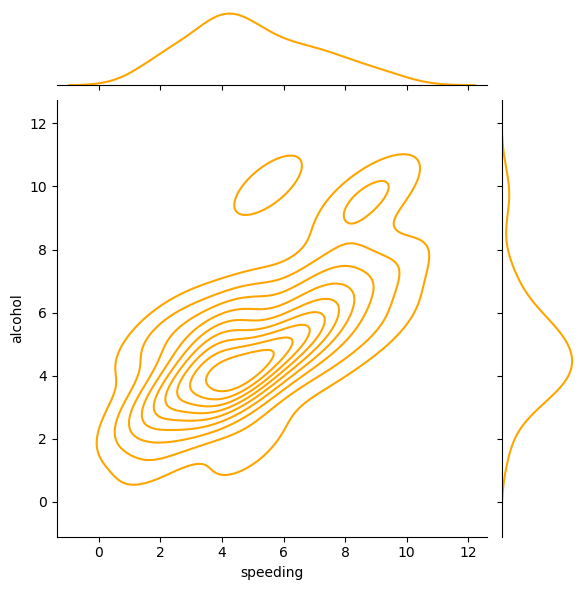

In [45]:
# Optional: hexbin jointplot
sns.jointplot(x="speeding", y="alcohol", data=df, kind="hex", color="orange")
plt.show()

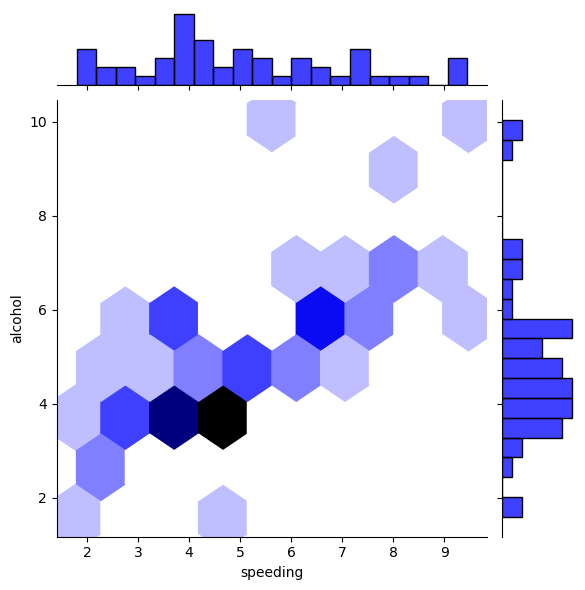

In [52]:
# Commonly used jointplot
sns.jointplot(
    data=df,
    x="speeding",
    y="alcohol",
    kind="hex",           # or 'scatter', 'kde', 'reg'
    color="blue",         # plot color
    height=6,             # overall figure size
    marginal_kws={"bins": 20},  # extra settings for histogram bins
)

plt.show()

# KDE Plot

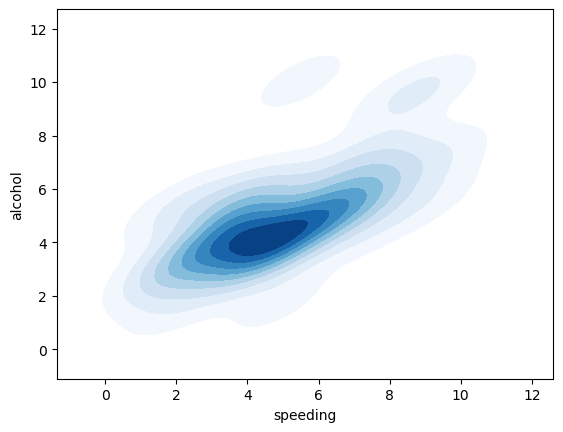

In [69]:
# Basic 2D KDE plot
sns.kdeplot(
    data=df,
    x="speeding",
    y="alcohol",
    fill=True,       # fill contours
    cmap="Blues"     # color map
)

plt.show()

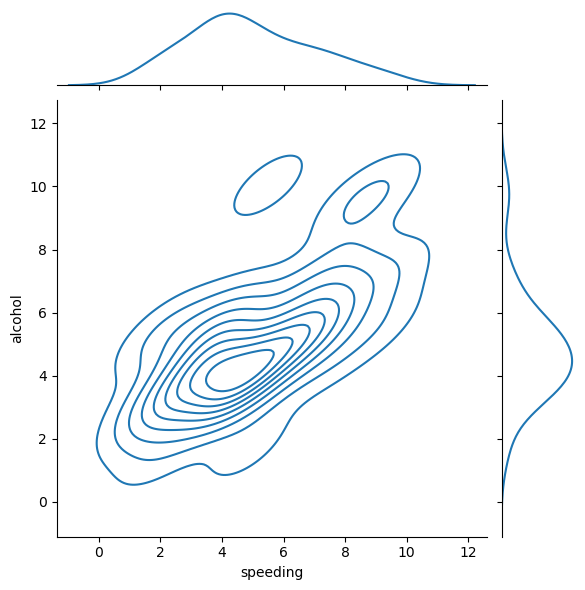

In [71]:
# Basic KDE jointplot
sns.jointplot(
    data=df,
    x="speeding",
    y="alcohol",
    kind="kde"
)
plt.show()

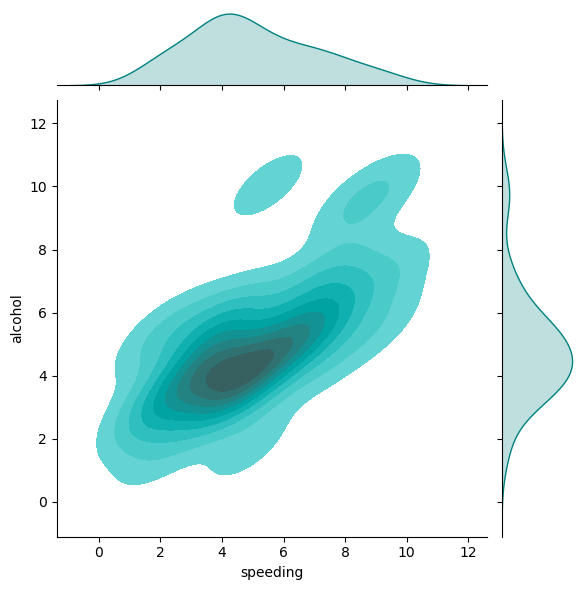

In [73]:
# Create a KDE jointplot
sns.jointplot(
    data=df,
    x="speeding",
    y="alcohol",
    kind="kde",          # KDE plot
    fill=True,           # Fill the contour area
    color="teal",        # Color of the plot
    height=6,            # Size of the figure
    #space=0.3,           # Space between main and marginal plots
    marginal_kws={"fill": True},  # Fill histograms on top/right
)

plt.show()

# Pair plot

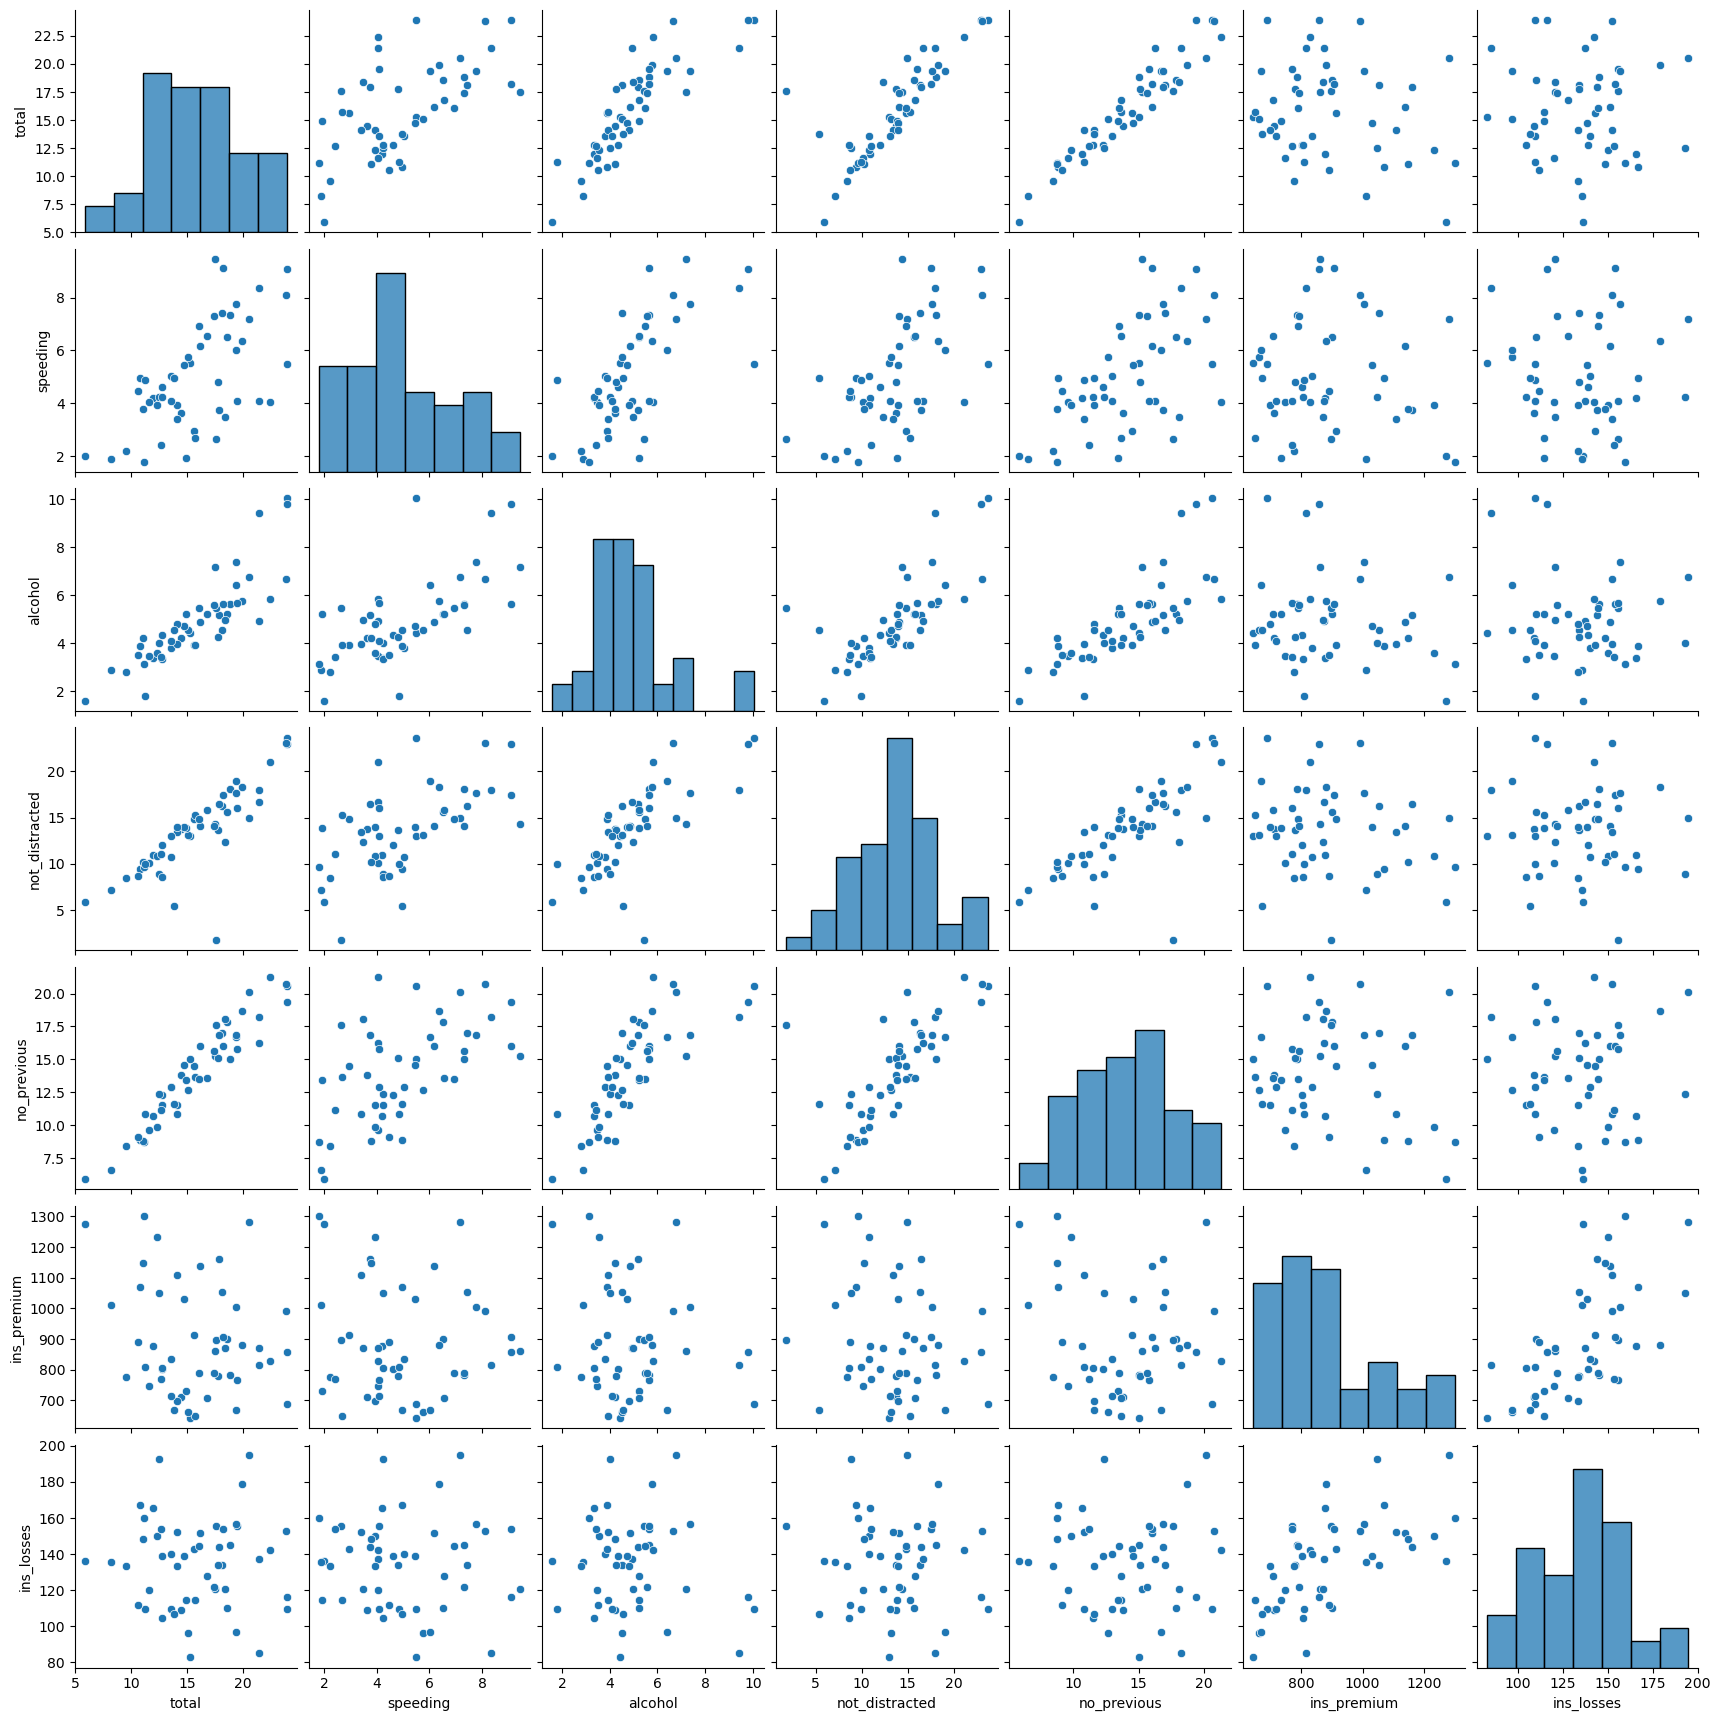

In [84]:
sns.pairplot(data=df)
plt.show()

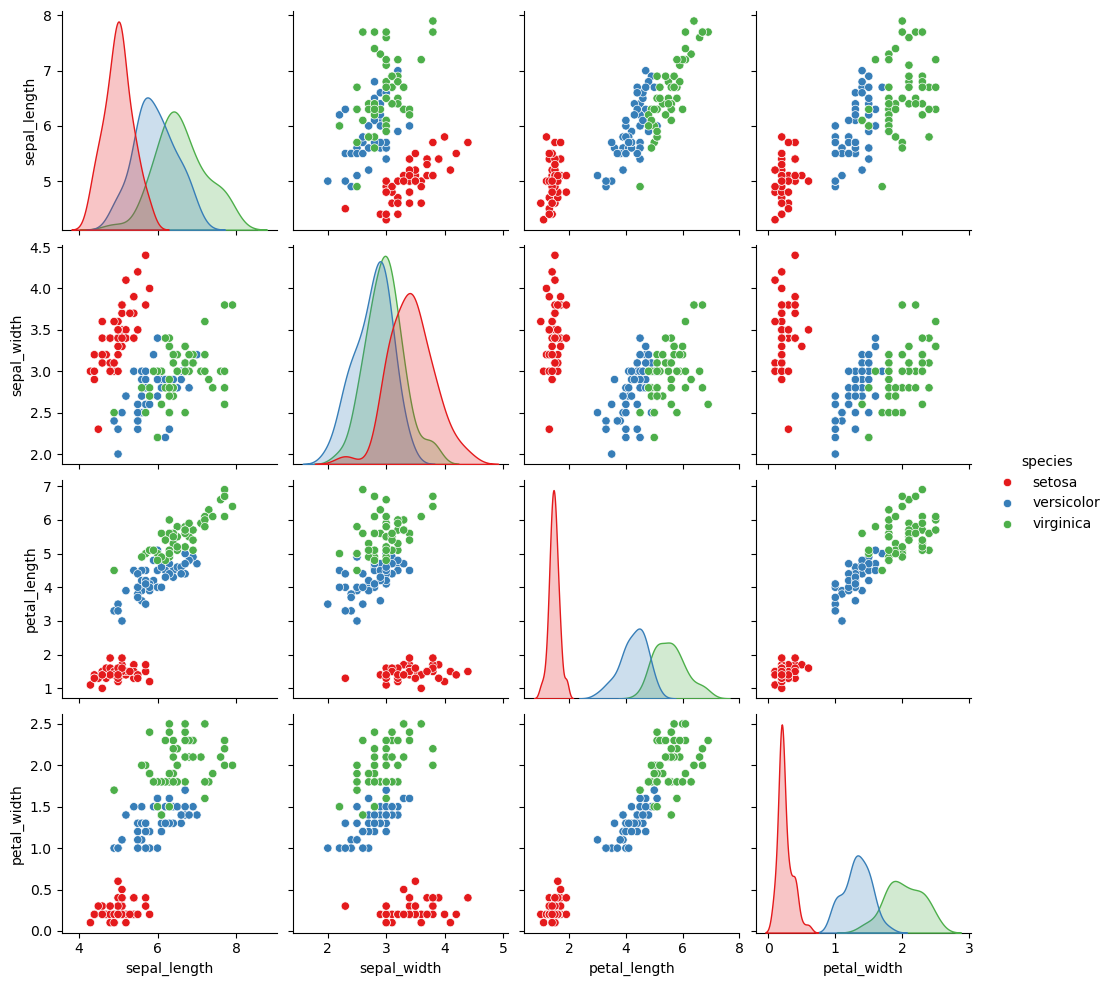

In [102]:
iris_df = sns.load_dataset("iris")

sns.pairplot(data=iris_df, hue="species", palette="Set1")
plt.show()


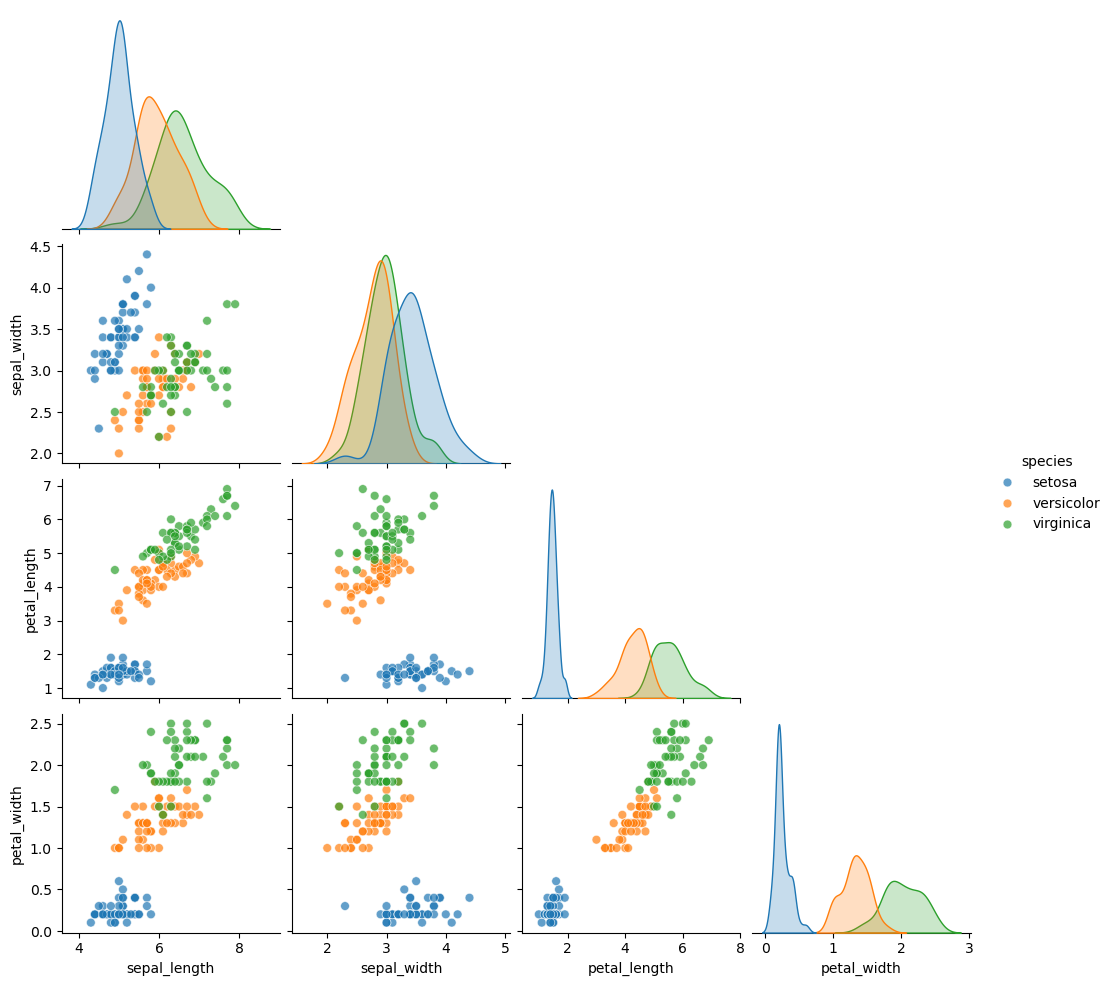

In [91]:
sns.pairplot(
    data=iris_df,
    hue="species",
    corner=True,
    plot_kws={"s": 40, "alpha": 0.7}
)
plt.show()


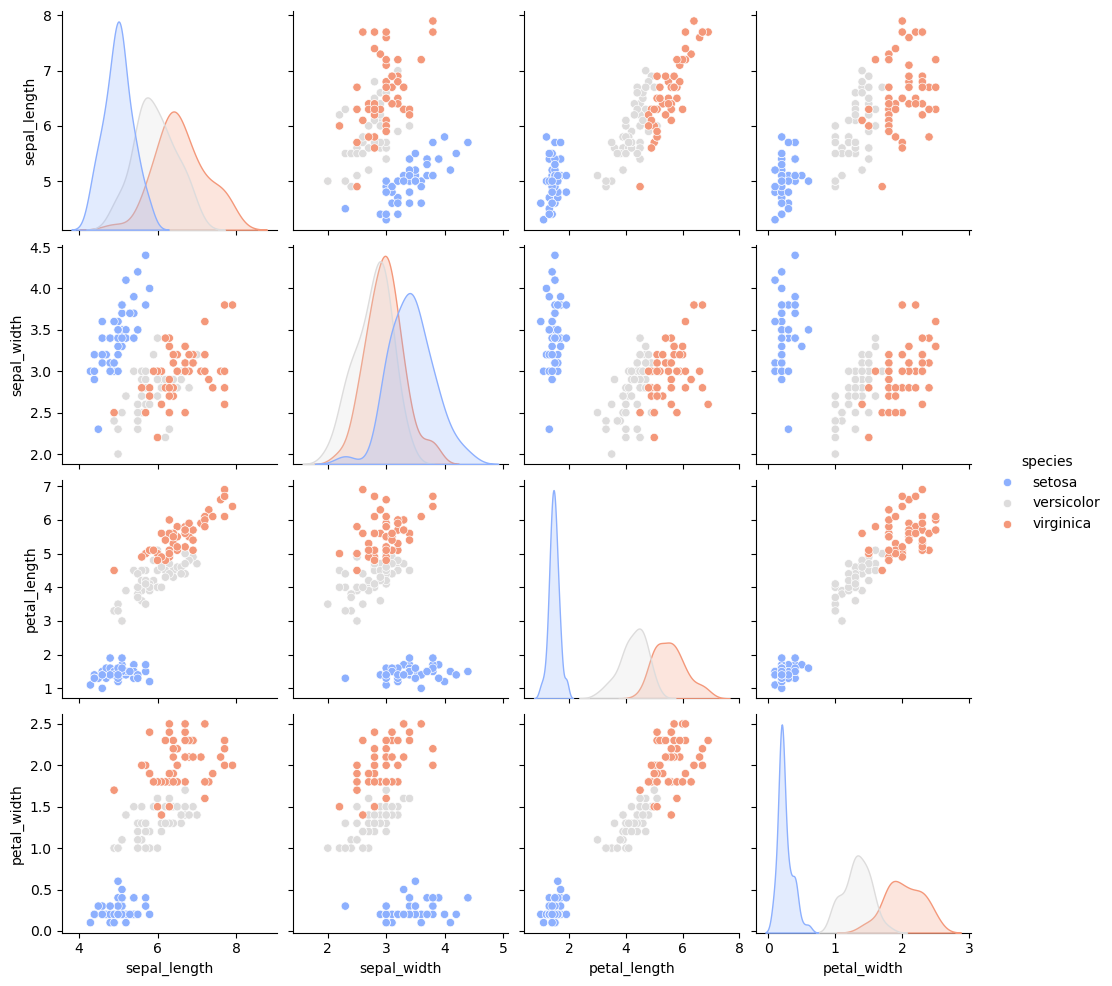

In [94]:
sns.pairplot(data=iris_df, hue="species", diag_kind="kde", palette="coolwarm")
plt.show()


# Rug Plot

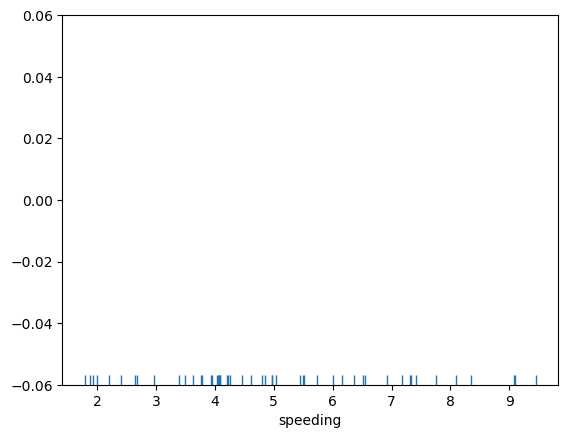

In [117]:
sns.rugplot(x=df["speeding"])
plt.show()


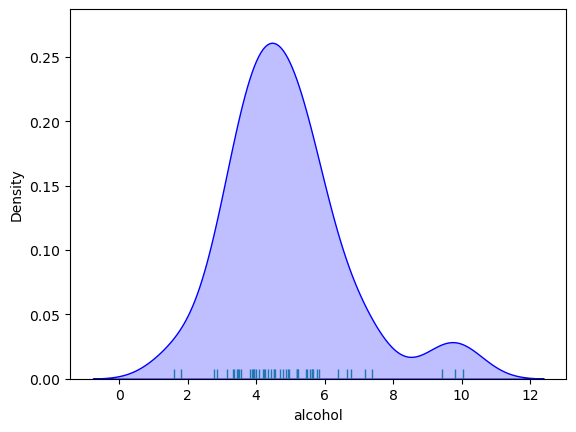

In [123]:
sns.kdeplot(x=df["alcohol"] , fill = True , color = "Blue")
sns.rugplot(x=df["alcohol"])
plt.show()


# Styling

<Figure size 800x500 with 0 Axes>

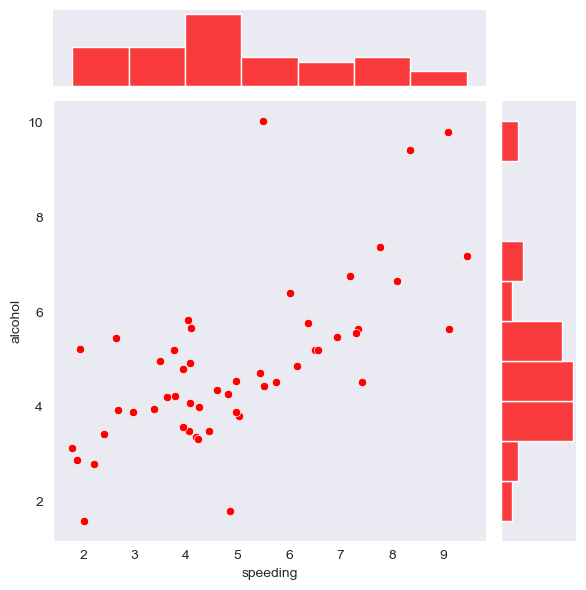

In [140]:
sns.set_style("dark")  # or "darkgrid", "white", "dark", "ticks"

plt.figure(figsize =(8 , 5))
sns.jointplot(data = df , x = "speeding", y = "alcohol" , color = "red")
plt.show()

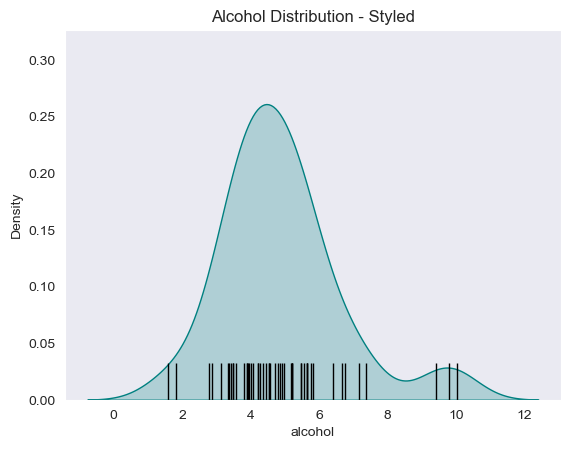

In [138]:
# Set global style
sns.set_style("dark")

# Create a KDE + Rugplot
sns.kdeplot(x=df["alcohol"], fill=True, color="teal")
sns.rugplot(x=df["alcohol"], color="black", height=0.1)
plt.title("Alcohol Distribution - Styled")
plt.show()

# Categorical PLOTS

# Bar Plot

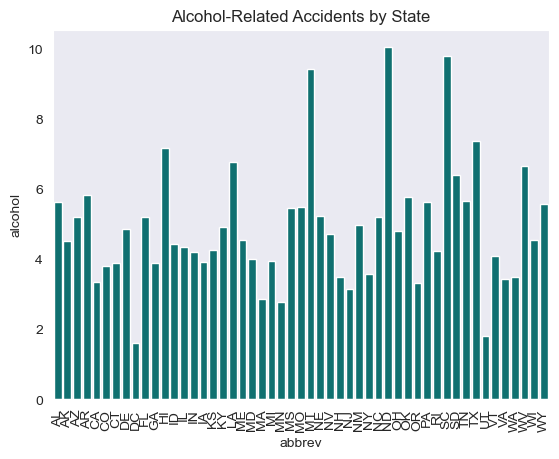

In [143]:
sns.barplot(data=df, x="abbrev", y="alcohol", color="teal")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Alcohol-Related Accidents by State")
plt.show()


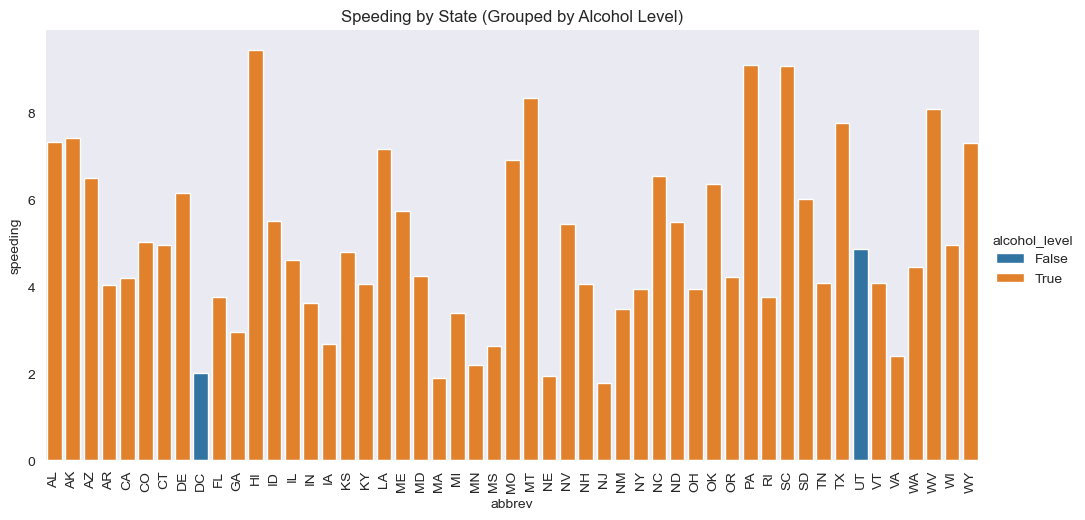

In [147]:
# Create a new column: alcohol level category
df["alcohol_level"] = df["alcohol"] > 2

sns.catplot(data=df, x="abbrev", y="speeding", hue="alcohol_level", kind="bar", height=5, aspect=2)
plt.xticks(rotation=90)
plt.title("Speeding by State (Grouped by Alcohol Level)")
plt.show()


# Count Plot

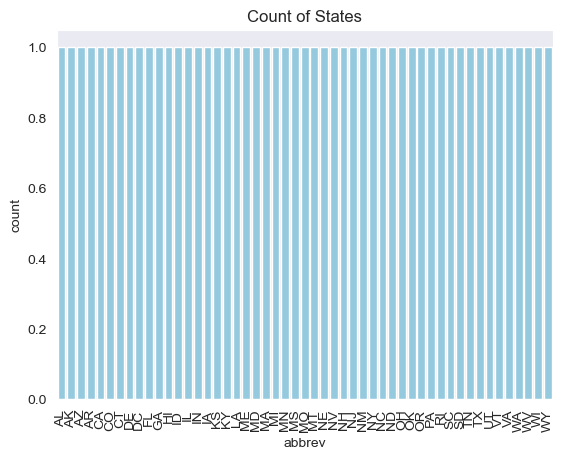

In [160]:
sns.countplot(data=df, x="abbrev", color="skyblue")
plt.xticks(rotation=90)
plt.title("Count of States")
plt.show()


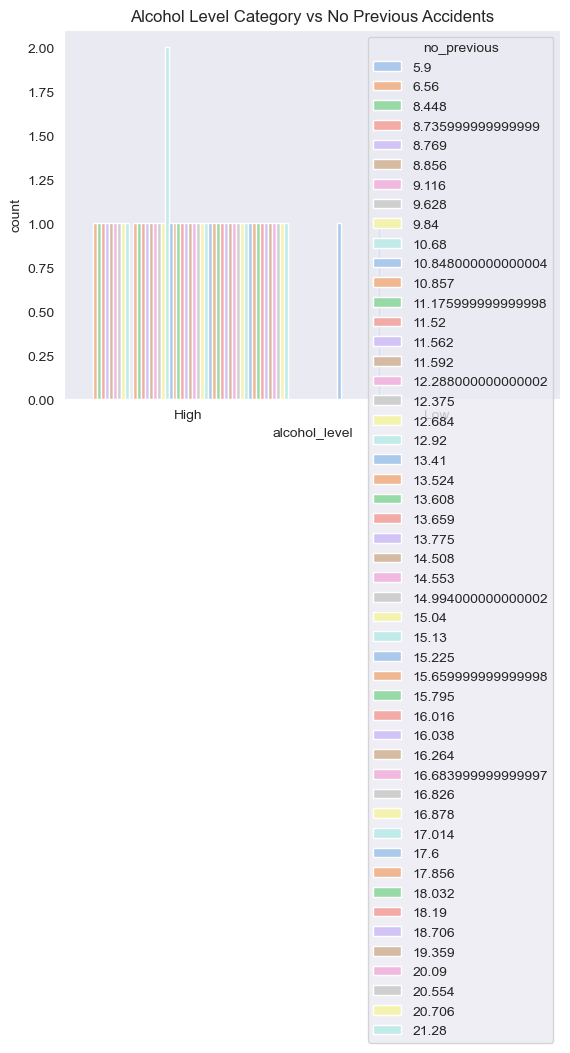

In [172]:
# Create a category: High or Low Alcohol
df["alcohol_level"] = df["alcohol"].apply(lambda x: "High" if x > 2 else "Low")

# Countplot with hue
sns.countplot(data=df, x="alcohol_level", hue="no_previous", palette="pastel")
plt.title("Alcohol Level Category vs No Previous Accidents")
plt.show()

# Box PLot

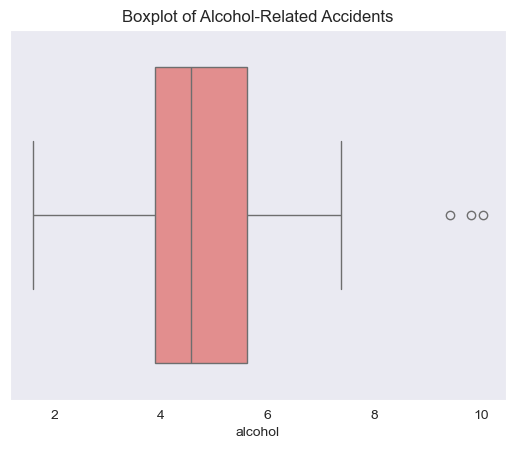

In [162]:
sns.boxplot(data=df, x="alcohol", color="lightcoral")
plt.title("Boxplot of Alcohol-Related Accidents")
plt.show()


C:\Users\DeLL\AppData\Local\Temp\ipykernel_8548\2583418469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="alcohol_level", y="ins_premium", palette="Set2")


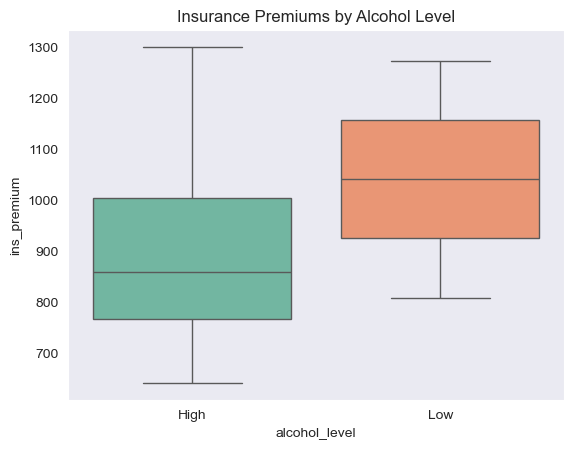

In [175]:
# Boxplot comparing ins_premium based on alcohol level
sns.boxplot(data=df, x="alcohol_level", y="ins_premium", palette="Set2")
plt.title("Insurance Premiums by Alcohol Level")
plt.show()


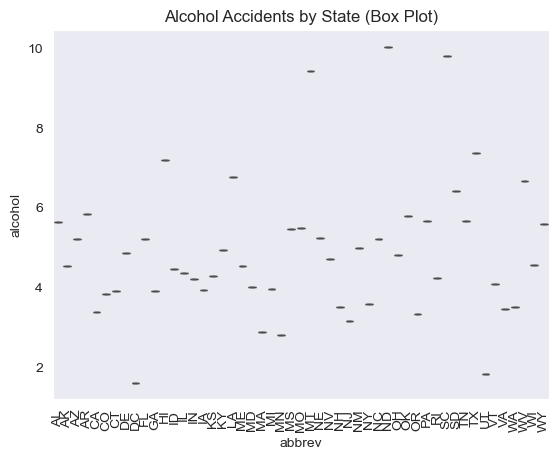

In [168]:
sns.boxplot(data=df, y="alcohol", x="abbrev", color="orange")
plt.xticks(rotation=90)
plt.title("Alcohol Accidents by State (Box Plot)")
plt.show()


# Violen Plot

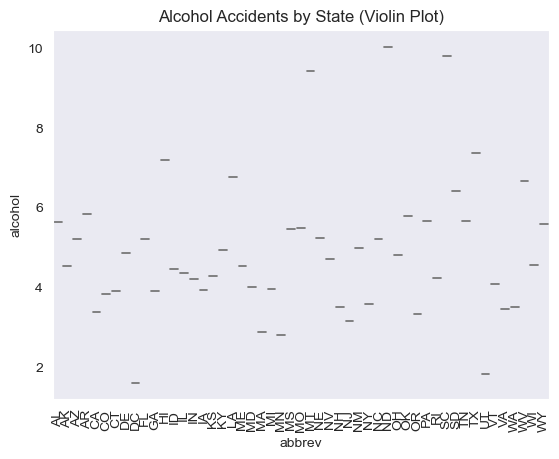

In [170]:
sns.violinplot(data=df, x="abbrev", y="alcohol", color="lightgreen")
plt.xticks(rotation=90)
plt.title("Alcohol Accidents by State (Violin Plot)")
plt.show()


C:\Users\DeLL\AppData\Local\Temp\ipykernel_8548\693438452.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="alcohol_level", y="speeding", palette="muted", inner="quartile")


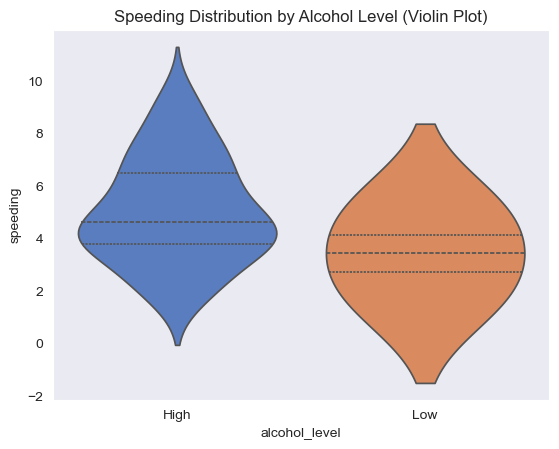

In [178]:
# Violin plot: Speeding distribution grouped by alcohol level
sns.violinplot(data=df, x="alcohol_level", y="speeding", palette="muted", inner="quartile")
plt.title("Speeding Distribution by Alcohol Level (Violin Plot)")
plt.show()

# Strip Plot

In [181]:
# Load Seaborn built-in "tips" dataset
tips_df = sns.load_dataset("tips")

# View the first few rows
print(tips_df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


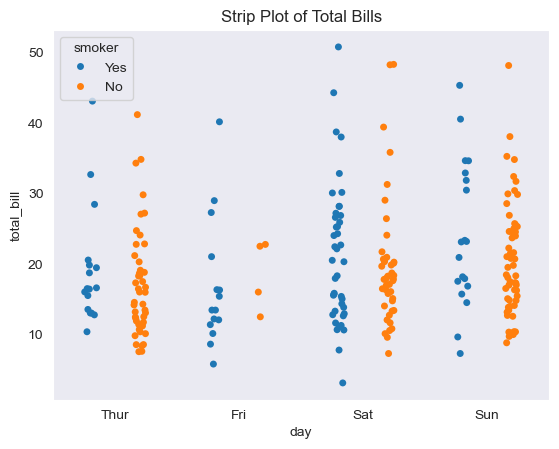

In [193]:
sns.stripplot(data=tips_df, x="day", y="total_bill", hue="smoker", jitter=True, dodge=True)
plt.title("Strip Plot of Total Bills")
plt.show()


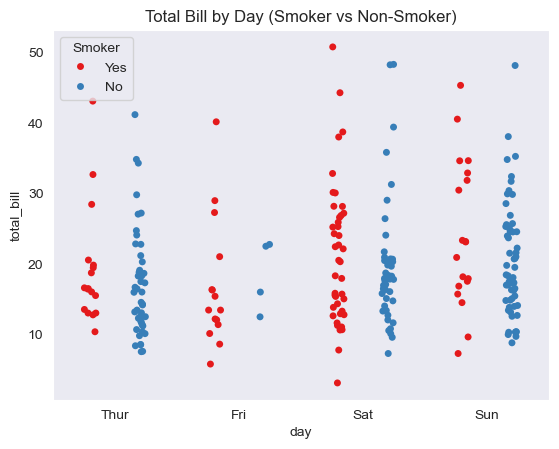

In [197]:
sns.stripplot(
    data=tips_df,
    x="day", 
    y="total_bill", 
    hue="smoker",      # Color by smoker/non-smoker
    jitter=True,       # Spread overlapping points
    dodge=True,        # Move hue groups side by side
    palette="Set1"
)
plt.title("Total Bill by Day (Smoker vs Non-Smoker)")
plt.legend(title="Smoker")
plt.show()

# Swarm PLot

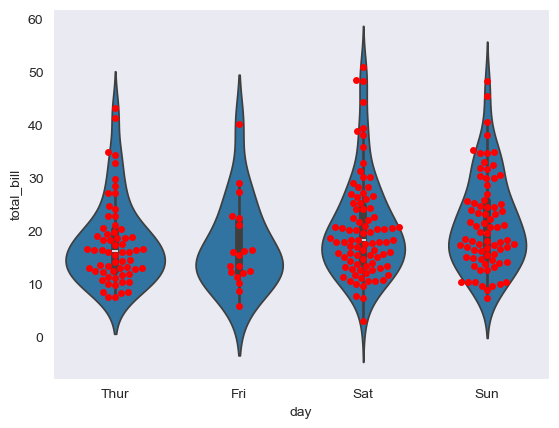

In [208]:

sns.violinplot(data=tips_df , x = "day" , y = "total_bill" )
sns.swarmplot(data=tips_df , x = "day" , y = "total_bill" , color = "red")
plt.show()

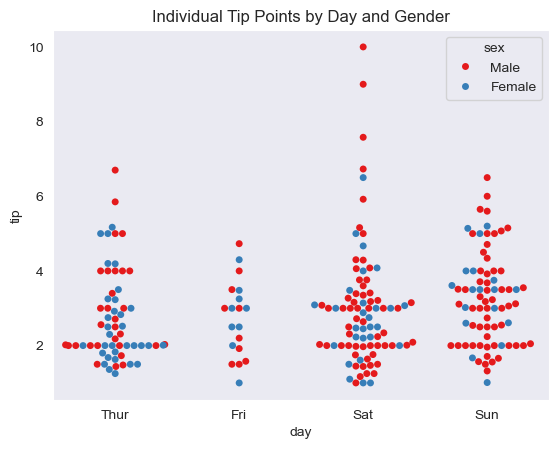

In [230]:
sns.swarmplot(data=tips_df, x="day", y="tip", hue="sex", palette="Set1")
#plt.legend(loc= "upper left")
plt.title("Individual Tip Points by Day and Gender")
plt.show()


# Palettes

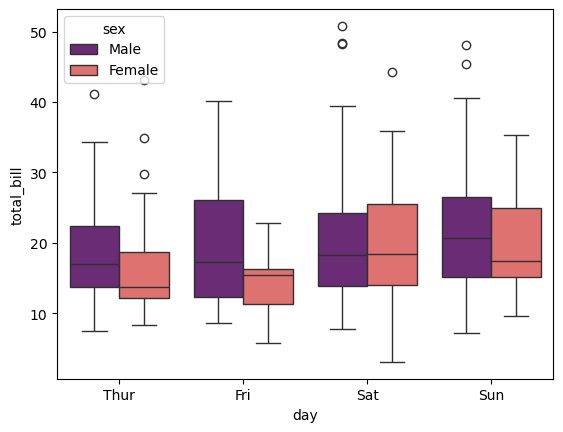

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

sns.set_palette("pastel")  # Optional, will be overridden below

sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="magma") 
plt.show()


# Heatmaps

In [23]:

df.head()


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


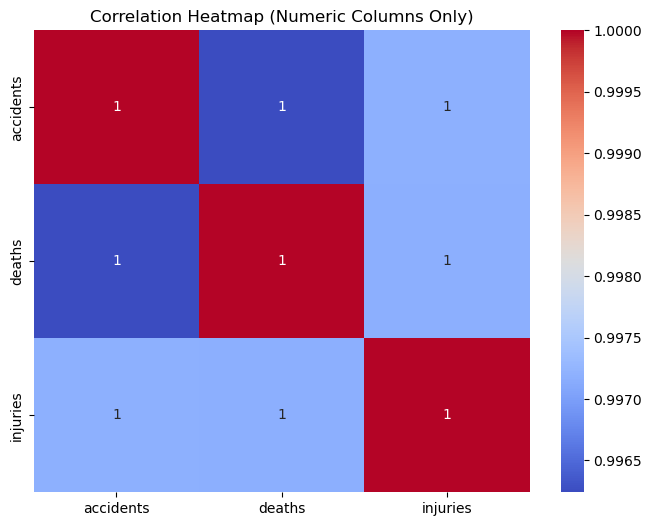

In [39]:
df = pd.DataFrame({
    "state": ["AL", "TX", "CA", "NY", "FL"],
    "accidents": [120, 200, 150, 300, 250],
    "deaths": [30, 50, 40, 70, 60],
    "injuries": [90, 130, 110, 180, 160]
})

# Compute correlation only on numeric columns
crash_ma = df.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crash_ma, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

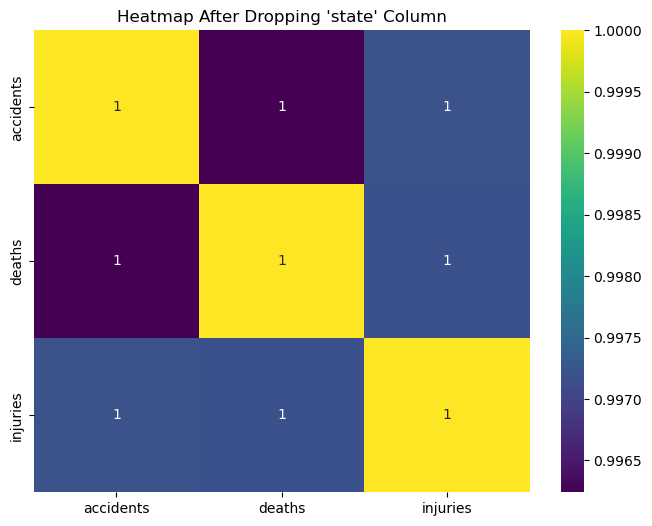

In [35]:
# Drop 'state' manually
crash_ma = df.drop(columns=['state']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(crash_ma, annot=True, cmap="viridis")
plt.title("Heatmap After Dropping 'state' Column")
plt.show()


# Cluster Map

<Figure size 500x500 with 0 Axes>

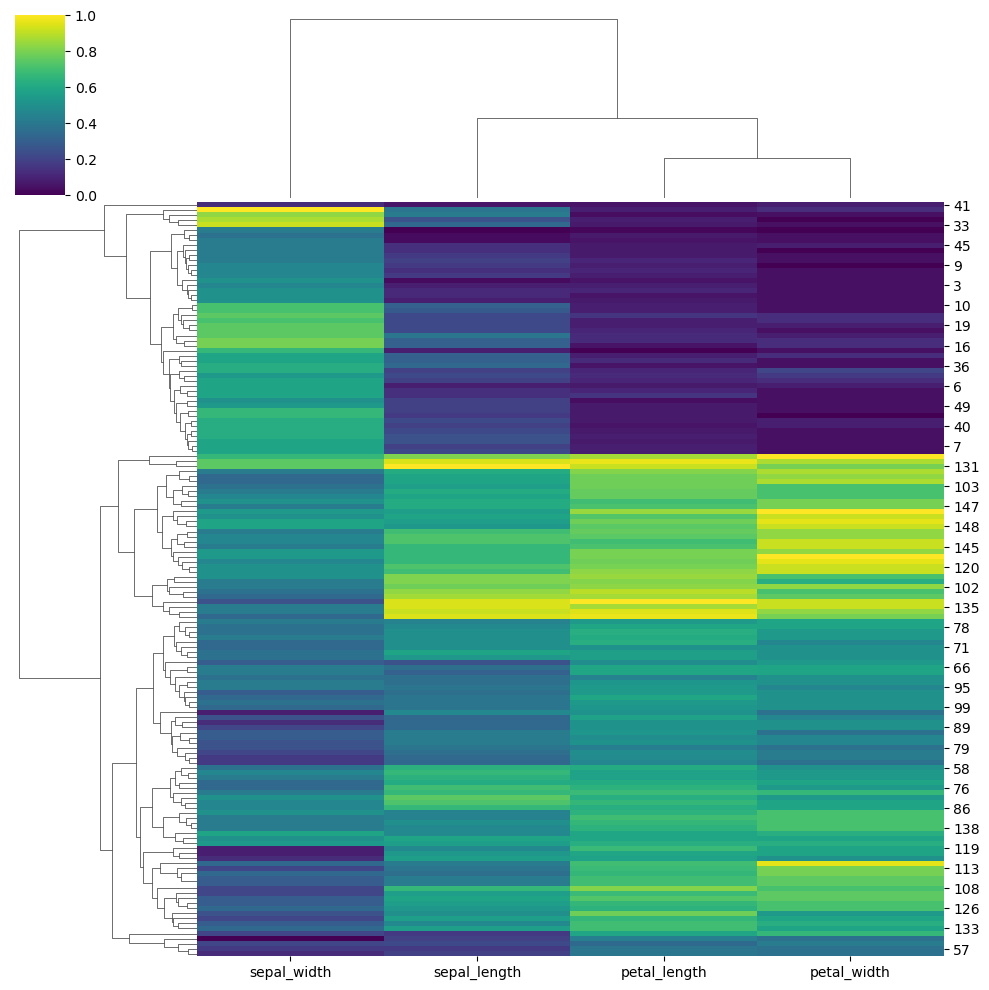

In [56]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
plt.figure(figsize = (5 , 5))
sns.clustermap(iris , cmap="viridis", standard_scale=1)
plt.show()

# Pair grid

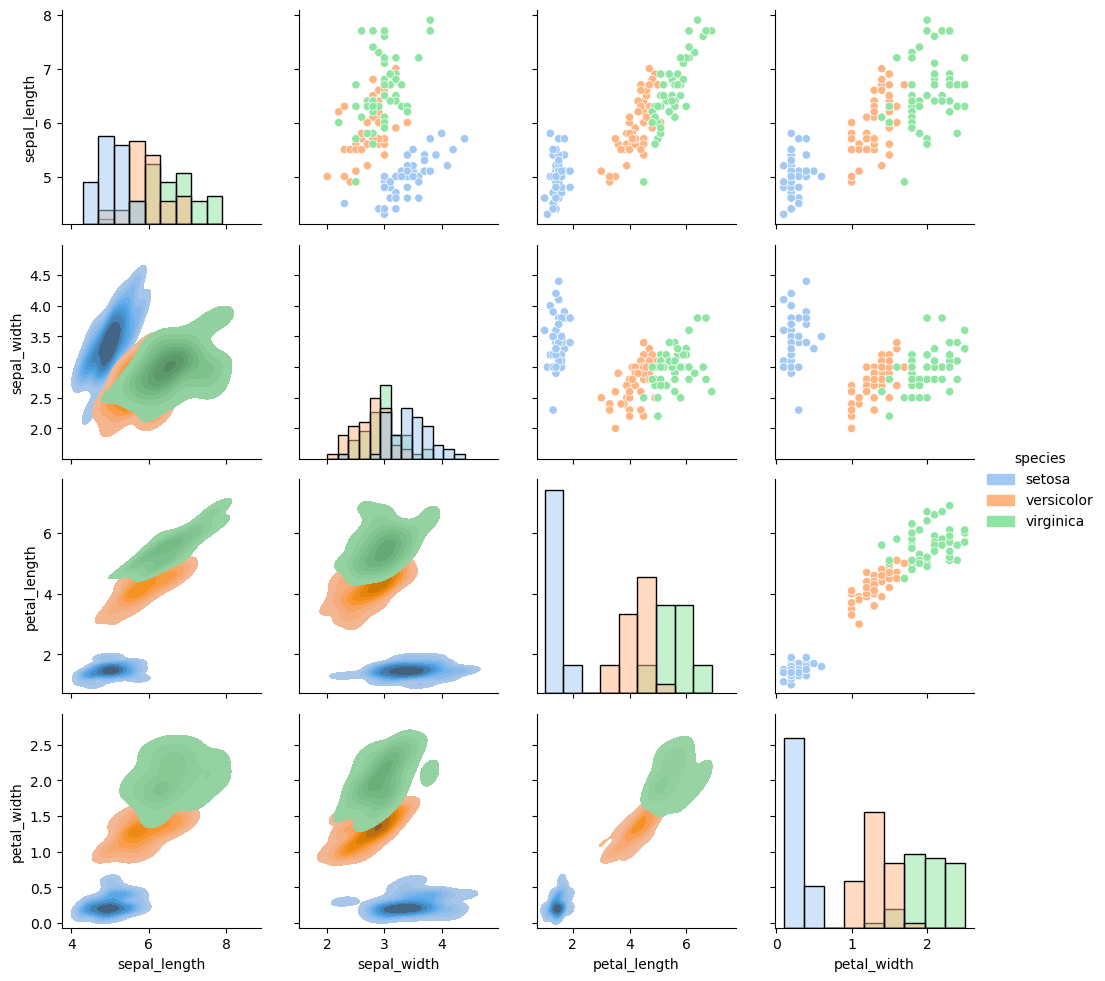

In [59]:
iris = sns.load_dataset("iris")

g = sns.PairGrid(iris, hue="species")
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.add_legend()
plt.show()

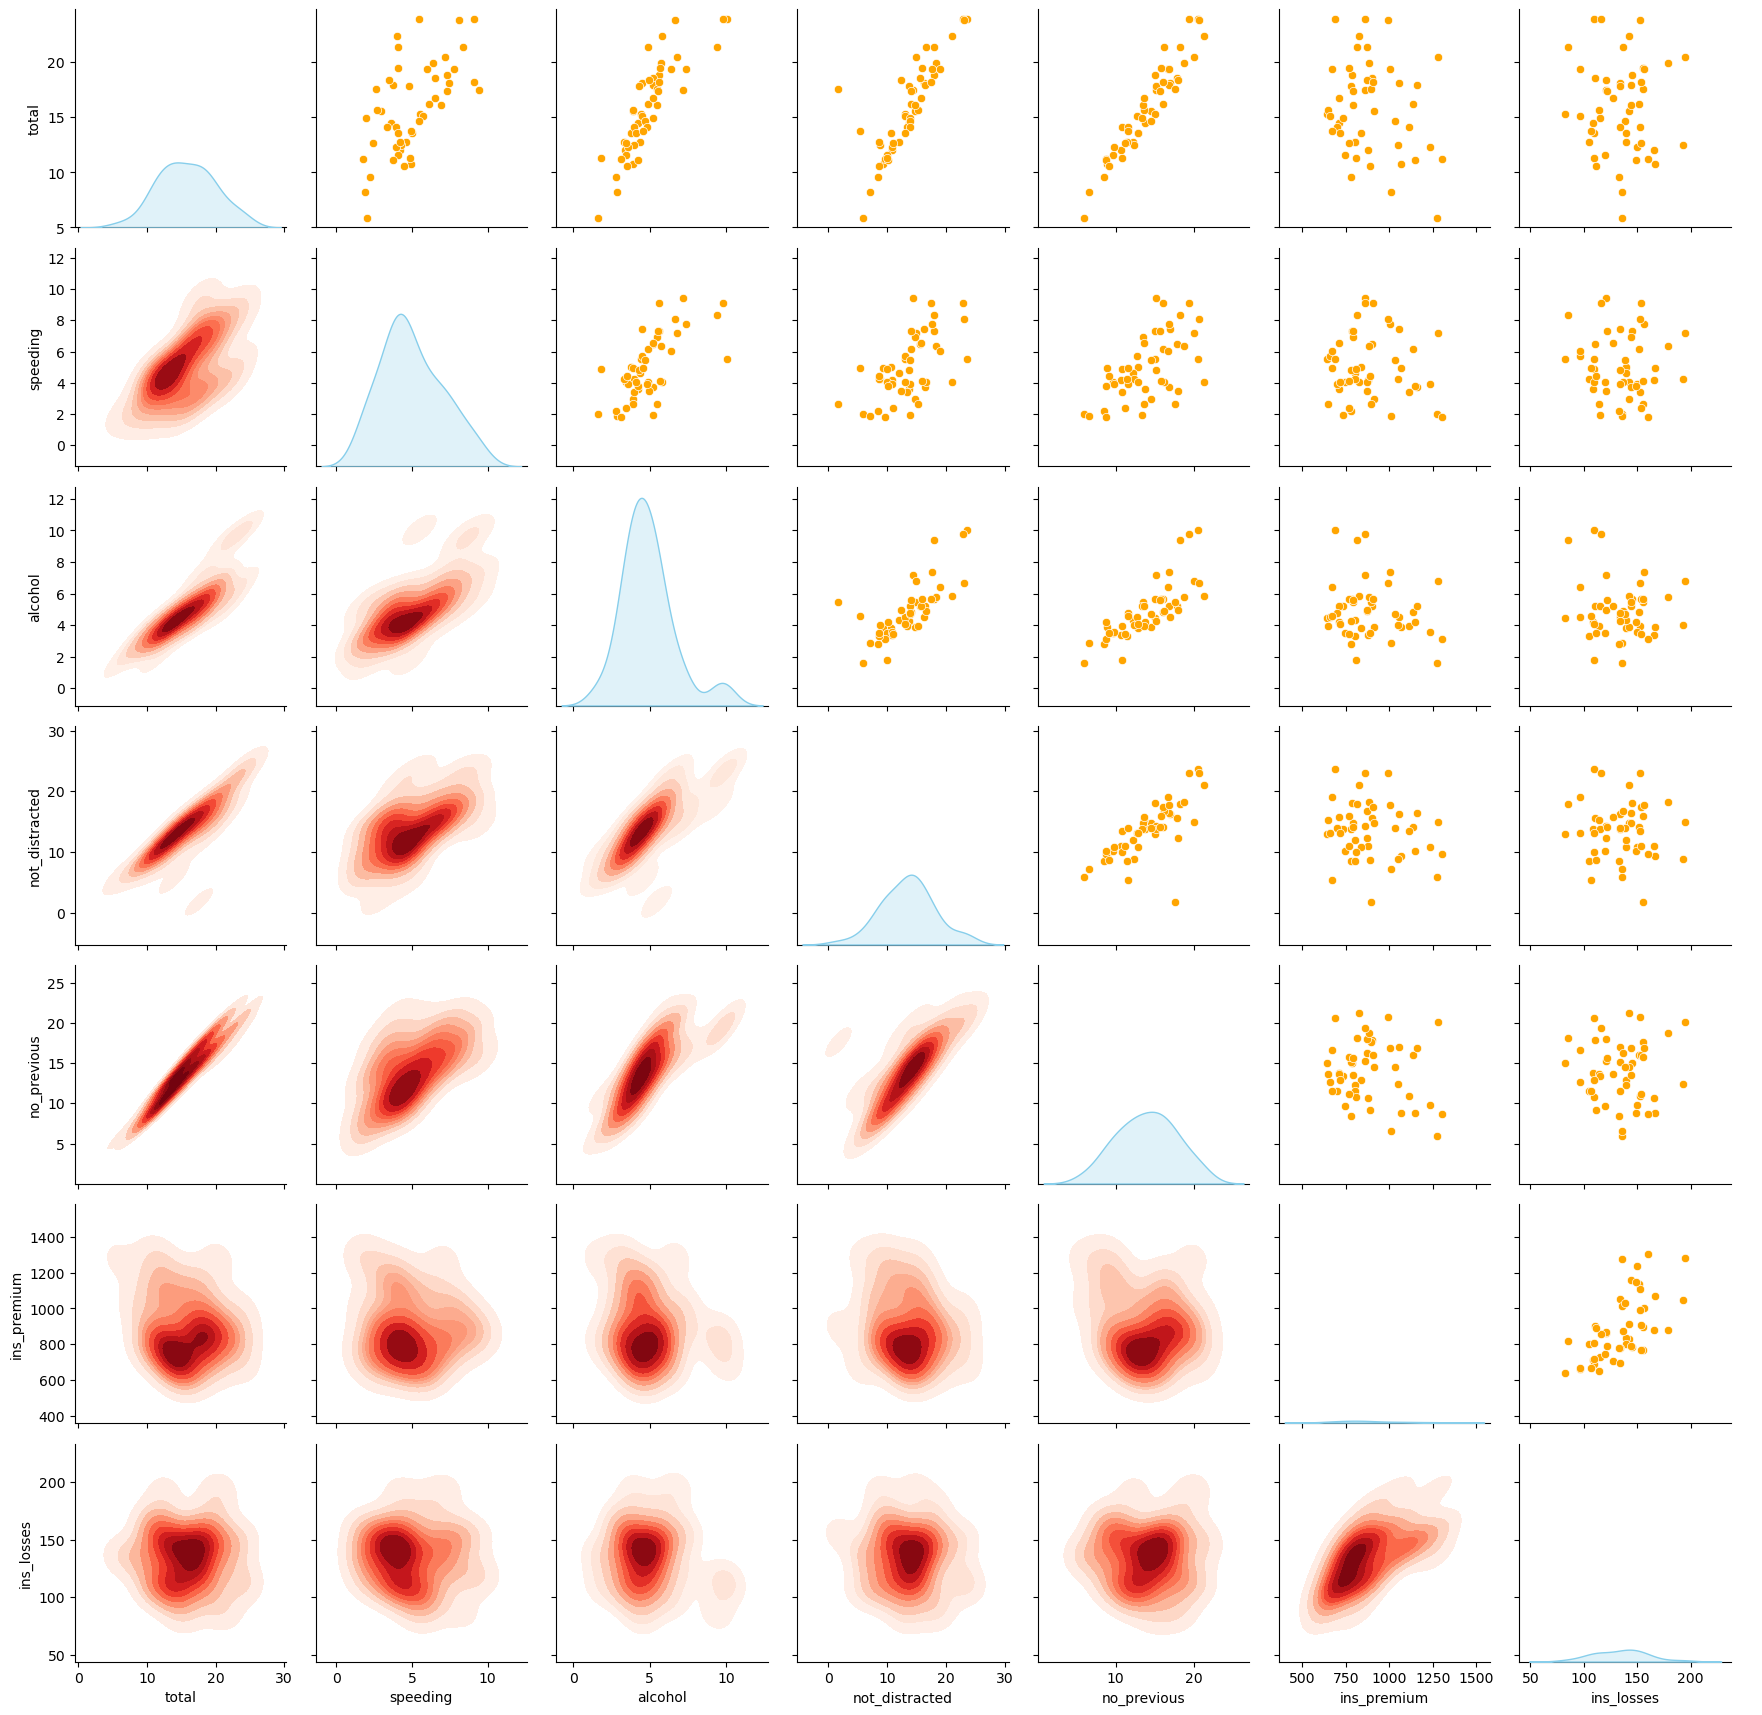

In [64]:
crashes = sns.load_dataset("car_crashes")

# Select only numeric columns
crash_data = crashes.select_dtypes(include='number')

g = sns.PairGrid(crash_data)
g.map_diag(sns.kdeplot, fill=True, color="skyblue")
g.map_upper(sns.scatterplot, color="orange")
g.map_lower(sns.kdeplot, fill=True, cmap="Reds")
g.add_legend()
plt.show()


# Facet grid

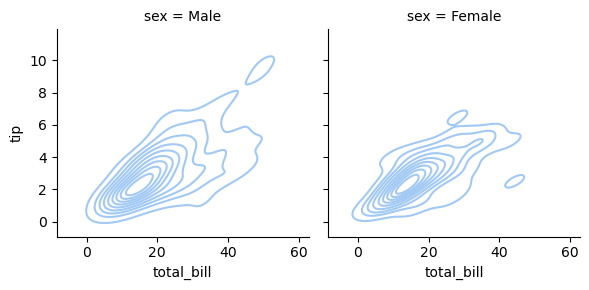

In [78]:
tips = sns.load_dataset("tips")

g = sns.FacetGrid(tips, col="sex")
g.map(sns.kdeplot, "total_bill", "tip")
plt.show()

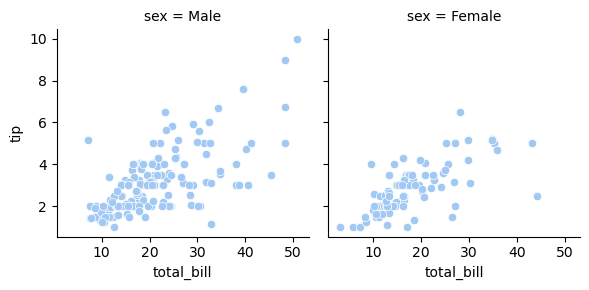

In [80]:
tips = sns.load_dataset("tips")

g = sns.FacetGrid(tips, col="sex")
g.map(sns.scatterplot, "total_bill", "tip")
plt.show()

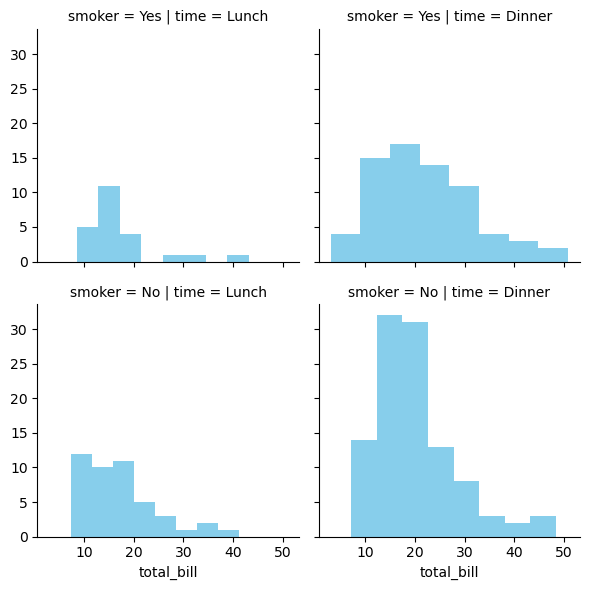

In [76]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map(plt.hist, "total_bill", bins=8, color="skyblue")
plt.show()

# Regression 

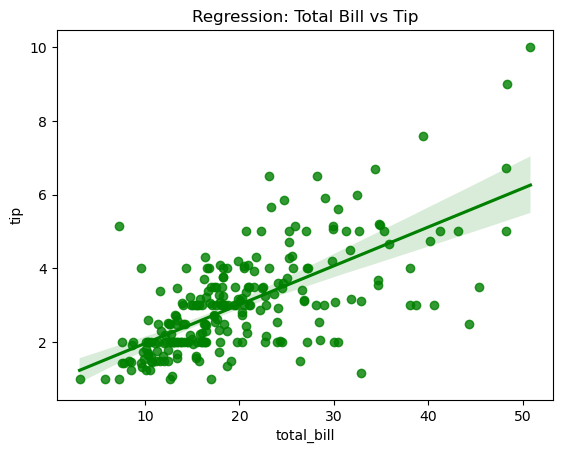

In [83]:
# Load dataset
tips = sns.load_dataset("tips")

# Create regression plot
sns.regplot(x="total_bill", y="tip", data=tips, color="green")
plt.title("Regression: Total Bill vs Tip")
plt.show()

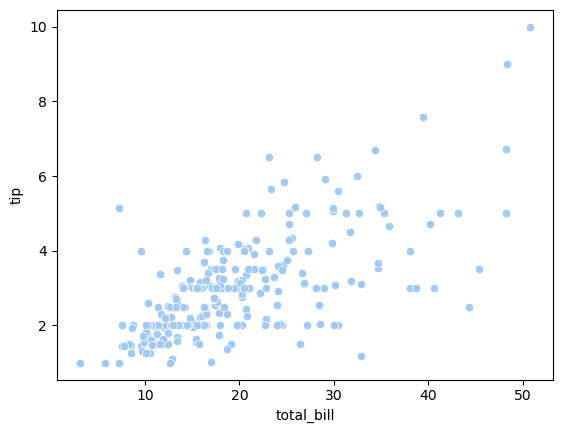

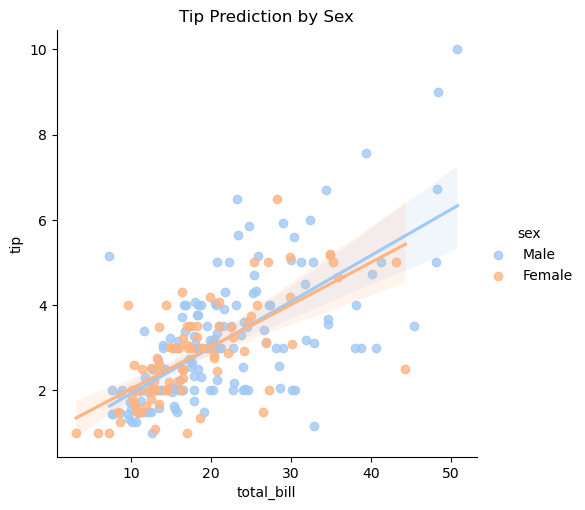

In [87]:
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips)
plt.title("Tip Prediction by Sex")
plt.show()
